In [1]:
# Data handling
import pandas as pd
import numpy as np
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

!pip install squarify
import squarify

# Date and time handling
import datetime as dt

# Outlier detection
from scipy import stats

### **Data Preparation**

In [2]:
df = pd.read_csv("cicopendata.csv")

print("Data loaded successfully!")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.info())

Data loaded successfully!
Shape: (114635, 22)
Columns: ['CDPHId', 'ProductName', 'CSFId', 'CSF', 'CompanyId', 'CompanyName', 'BrandName', 'PrimaryCategoryId', 'PrimaryCategory', 'SubCategoryId', 'SubCategory', 'CasId', 'CasNumber', 'ChemicalId', 'ChemicalName', 'InitialDateReported', 'MostRecentDateReported', 'DiscontinuedDate', 'ChemicalCreatedAt', 'ChemicalUpdatedAt', 'ChemicalDateRemoved', 'ChemicalCount']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CDPHId                  114635 non-null  int64  
 1   ProductName             114635 non-null  object 
 2   CSFId                   80662 non-null   float64
 3   CSF                     80237 non-null   object 
 4   CompanyId               114635 non-null  int64  
 5   CompanyName             114635 non-null  object 
 6   BrandName               114408 non-null

In [3]:
df2 = pd.read_excel("cicopendata_sc.xlsx")

print("Data loaded successfully!")
print("Shape:", df2.shape)
print("Columns:", df2.columns.tolist())
print(df2.info())

Data loaded successfully!
Shape: (13, 2)
Columns: ['Primary Category', 'SubCategory']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Primary Category  13 non-null     object
 1   SubCategory       13 non-null     object
dtypes: object(2)
memory usage: 340.0+ bytes
None


In [4]:
# Inspect subcategory mapping
print("Subcategory Mapping Preview:")
print(df2.head(10))
print("\nColumn Names in df2:")
print(df2.columns.tolist())

Subcategory Mapping Preview:
                    Primary Category  \
0                      Baby Products   
1                      Bath Products   
2                         Fragrances   
3  Hair Care Products (non-coloring)   
4             Hair Coloring Products   
5    Makeup Products (non-permanent)   
6                      Nail Products   
7              Oral Hygiene Products   
8             Personal Care Products   
9                   Shaving Products   

                                         SubCategory  
0  Baby Shampoos, Baby Skin Care, Baby Wash/Soap,...  
1  Bath Additives, Body Washes and Soaps, Bubble ...  
2  Cologne, Perfumes - Oils and Lotions, Perfumes...  
3  Hair Conditioners (leave-in), Hair Conditioner...  
4  Hair Bleaches, Hair Color Sprays (aerosol), Ha...  
5  Blushes, Eye Shadow, Eyeliner/Eyebrow Pencils,...  
6  Artificial Nails and Related Products, Basecoa...  
7  Mouthwashes and Breath Fresheners, Teeth Clean...  
8  Antiperspirants (making a cosmet

Since all the categories and sub-categories are already mapped correctly, we dont need the sub-category file.

In [5]:
df.isna().sum()

,0
CDPHId,0
ProductName,0
CSFId,33973
CSF,34398
CompanyId,0
CompanyName,0
BrandName,227
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


In [6]:
# Convert date columns to datetime
date_cols = ["InitialDateReported", "MostRecentDateReported",
             "DiscontinuedDate", "ChemicalCreatedAt",
             "ChemicalUpdatedAt", "ChemicalDateRemoved"]

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CSFId                   80662 non-null   float64       
 3   CSF                     80237 non-null   object        
 4   CompanyId               114635 non-null  int64         
 5   CompanyName             114635 non-null  object        
 6   BrandName               114408 non-null  object        
 7   PrimaryCategoryId       114635 non-null  int64         
 8   PrimaryCategory         114635 non-null  object        
 9   SubCategoryId           114635 non-null  int64         
 10  SubCategory             114635 non-null  object        
 11  CasId                   114635 non-null  int64         
 12  CasNumber               108159

In [7]:
# - Fill missing BrandName with 'Unknown'
df["BrandName"] = df["BrandName"].fillna("Unknown")

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114635 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  114635 non-null  int64         
 1   ProductName             114635 non-null  object        
 2   CSFId                   80662 non-null   float64       
 3   CSF                     80237 non-null   object        
 4   CompanyId               114635 non-null  int64         
 5   CompanyName             114635 non-null  object        
 6   BrandName               114635 non-null  object        
 7   PrimaryCategoryId       114635 non-null  int64         
 8   PrimaryCategory         114635 non-null  object        
 9   SubCategoryId           114635 non-null  int64         
 10  SubCategory             114635 non-null  object        
 11  CasId                   114635 non-null  int64         
 12  CasNumber               108159

In [8]:
df[["CSFId", "CSF", "CasNumber"]].head(10)

,CSFId,CSF,CasNumber
0,NaN,NaN,13463-67-7
1,NaN,NaN,65996-92-1
2,NaN,NaN,140-67-0
3,NaN,NaN,13463-67-7
4,NaN,NaN,13463-67-7
5,NaN,NaN,13463-67-7
6,310.0,5858-81-1,13463-67-7
7,311.0,D&C RED 7 CALCIUM LAKE,13463-67-7
8,312.0,D&C RED 28,13463-67-7
9,313.0,D&C RED 7 CALCIUM LAKE,13463-67-7


In [9]:
df["CSFId"].value_counts()

,count
CSFId,
54453.0,42
64843.0,20
64847.0,20
64848.0,20
64849.0,20
...,...
64995.0,1
64994.0,1
313.0,1


In [10]:
# Replace missing CSFId and CSF with 999999
df["CSFId"] = df["CSFId"].fillna(999999).astype(int)
df["CSF"] = df["CSF"].fillna("Not Reported")

print(df[["CSFId", "CSF", "CasNumber"]].head(12))

     CSFId                     CSF   CasNumber
0   999999            Not Reported  13463-67-7
1   999999            Not Reported  65996-92-1
2   999999            Not Reported    140-67-0
3   999999            Not Reported  13463-67-7
4   999999            Not Reported  13463-67-7
5   999999            Not Reported  13463-67-7
6      310               5858-81-1  13463-67-7
7      311  D&C RED 7 CALCIUM LAKE  13463-67-7
8      312              D&C RED 28  13463-67-7
9      313  D&C RED 7 CALCIUM LAKE  13463-67-7
10  999999            Not Reported  13463-67-7
11     314              D&C RED 28  13463-67-7


In [11]:
df["CasNumber"].value_counts()

,count
CasNumber,
13463-67-7,93049
79-81-2,2288
1333-86-4,2191
12001-26-2,1919
25013-16-5,1888
...,...
14807-96-6,1
30525-89-4,1
1116-54-7,1


In [12]:
df = df.dropna(subset=["CasNumber"])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 108159 entries, 0 to 114634
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  108159 non-null  int64         
 1   ProductName             108159 non-null  object        
 2   CSFId                   108159 non-null  int64         
 3   CSF                     108159 non-null  object        
 4   CompanyId               108159 non-null  int64         
 5   CompanyName             108159 non-null  object        
 6   BrandName               108159 non-null  object        
 7   PrimaryCategoryId       108159 non-null  int64         
 8   PrimaryCategory         108159 non-null  object        
 9   SubCategoryId           108159 non-null  int64         
 10  SubCategory             108159 non-null  object        
 11  CasId                   108159 non-null  int64         
 12  CasNumber               108159 non-

In [13]:
df.loc[:, "Is_Discontinued"] = df["DiscontinuedDate"].notna().astype(int)
df.loc[:, "Is_Removed"] = df["ChemicalDateRemoved"].notna().astype(int)


print(df[["DiscontinuedDate","ChemicalDateRemoved","Is_Discontinued","Is_Removed"]].head(5))


  DiscontinuedDate ChemicalDateRemoved  Is_Discontinued  Is_Removed
0       2011-02-01                 NaT                1           0
1              NaT                 NaT                0           0
2              NaT                 NaT                0           0
3              NaT                 NaT                0           0
4       2011-02-01                 NaT                1           0


In [14]:
# Extract Year from Date Fields
df.loc[:, "Year_Initial"]       = df["InitialDateReported"].dt.year
df.loc[:, "Year_Recent"]        = df["MostRecentDateReported"].dt.year
df.loc[:, "Year_Discontinued"]  = df["DiscontinuedDate"].dt.year
df.loc[:, "Year_Removed"]       = df["ChemicalDateRemoved"].dt.year

print(df[["InitialDateReported","Year_Initial",
          "MostRecentDateReported", "Year_Recent",
          "DiscontinuedDate","Year_Discontinued",
          "ChemicalDateRemoved","Year_Removed"]].head(5))


  InitialDateReported  Year_Initial MostRecentDateReported  Year_Recent  \
0          2009-06-17          2009             2013-08-28         2013   
1          2009-07-01          2009             2009-07-01         2009   
2          2009-07-01          2009             2009-07-01         2009   
3          2009-07-09          2009             2013-08-28         2013   
4          2009-07-09          2009             2013-08-28         2013   

  DiscontinuedDate  Year_Discontinued ChemicalDateRemoved  Year_Removed  
0       2011-02-01             2011.0                 NaT           NaN  
1              NaT                NaN                 NaT           NaN  
2              NaT                NaN                 NaT           NaN  
3              NaT                NaN                 NaT           NaN  
4       2011-02-01             2011.0                 NaT           NaN  


In [15]:
df.isnull().sum()

,0
CDPHId,0
ProductName,0
CSFId,0
CSF,0
CompanyId,0
CompanyName,0
BrandName,0
PrimaryCategoryId,0
PrimaryCategory,0
SubCategoryId,0


In [16]:
# Replace NaNs in year columns with 0 indicating "not discontinued/removed"
# This will be used just for just visualization and EDA not for modeling
df.loc[:, "Year_Discontinued"] = df["Year_Discontinued"].fillna(0).astype(int)
df.loc[:, "Year_Removed"] = df["Year_Removed"].fillna(0).astype(int)

print(df[["DiscontinuedDate","Year_Discontinued",
          "ChemicalDateRemoved","Year_Removed",
          "Is_Discontinued","Is_Removed"]].head(10))

  DiscontinuedDate  Year_Discontinued ChemicalDateRemoved  Year_Removed  \
0       2011-02-01             2011.0                 NaT           0.0   
1              NaT                0.0                 NaT           0.0   
2              NaT                0.0                 NaT           0.0   
3              NaT                0.0                 NaT           0.0   
4       2011-02-01             2011.0                 NaT           0.0   
5       2010-11-01             2010.0                 NaT           0.0   
6              NaT                0.0                 NaT           0.0   
7              NaT                0.0                 NaT           0.0   
8              NaT                0.0                 NaT           0.0   
9              NaT                0.0                 NaT           0.0   

   Is_Discontinued  Is_Removed  
0                1           0  
1                0           0  
2                0           0  
3                0           0  
4        

### **Exploratory Data Analysis**

In [17]:
print("Dataset shape:", df.shape)
print("\nColumn dtypes:\n", df.dtypes)

print("\nUnique counts:")
print("Companies:", df["CompanyName"].nunique())
print("Brands:", df["BrandName"].nunique())
print("Products:", df["ProductName"].nunique())
print("Chemicals:", df["ChemicalName"].nunique())

Dataset shape: (108159, 28)

Column dtypes:
 CDPHId                             int64
ProductName                       object
CSFId                              int64
CSF                               object
CompanyId                          int64
CompanyName                       object
BrandName                         object
PrimaryCategoryId                  int64
PrimaryCategory                   object
SubCategoryId                      int64
SubCategory                       object
CasId                              int64
CasNumber                         object
ChemicalId                         int64
ChemicalName                      object
InitialDateReported       datetime64[ns]
MostRecentDateReported    datetime64[ns]
DiscontinuedDate          datetime64[ns]
ChemicalCreatedAt         datetime64[ns]
ChemicalUpdatedAt         datetime64[ns]
ChemicalDateRemoved       datetime64[ns]
ChemicalCount                      int64
Is_Discontinued                    int64
Is_Removed  

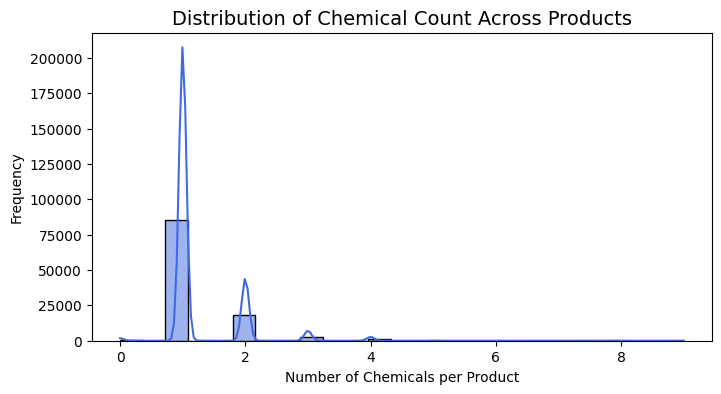

In [18]:
plt.figure(figsize=(8, 4))
sns.histplot(df["ChemicalCount"], bins=25, kde=True, color="royalblue")
plt.title("Distribution of Chemical Count Across Products", fontsize=14)
plt.xlabel("Number of Chemicals per Product")
plt.ylabel("Frequency")
plt.show()

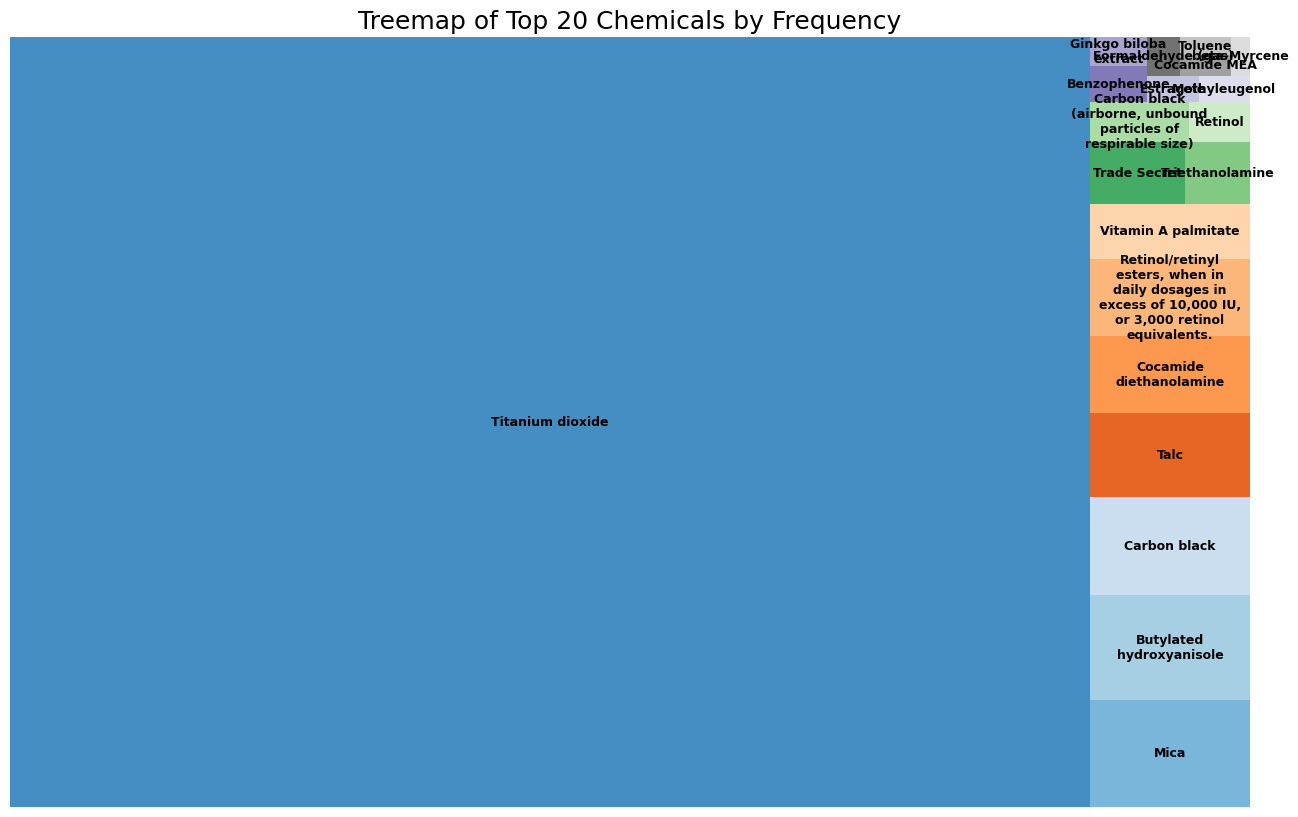

In [19]:
import textwrap

# Top 20 chemicals
top_chems = df["ChemicalName"].value_counts().head(20)

# Wrap long labels to multiple lines
wrapped_labels = [
    "\n".join(textwrap.wrap(name, 20)) for name in top_chems.index
]

plt.figure(figsize=(16,10))
squarify.plot(
    sizes=top_chems.values,
    label=wrapped_labels,
    alpha=0.9,
    color=sns.color_palette("tab20c", len(top_chems)),
    text_kwargs={'fontsize':9, 'weight':'bold'}
)
plt.title("Treemap of Top 20 Chemicals by Frequency", fontsize=18)
plt.axis("off")
plt.show()

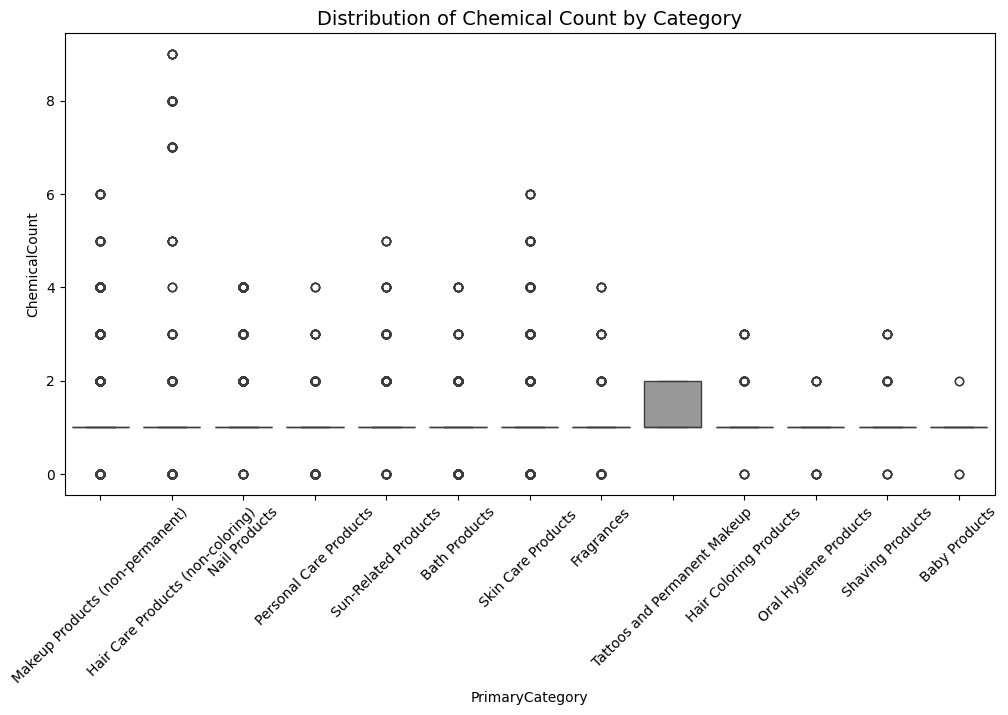

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x="PrimaryCategory", y="ChemicalCount", data=df,
            hue="PrimaryCategory", dodge=False, legend=False,
            palette="Set1")
plt.xticks(rotation=45)
plt.title("Distribution of Chemical Count by Category", fontsize=14)
plt.show()

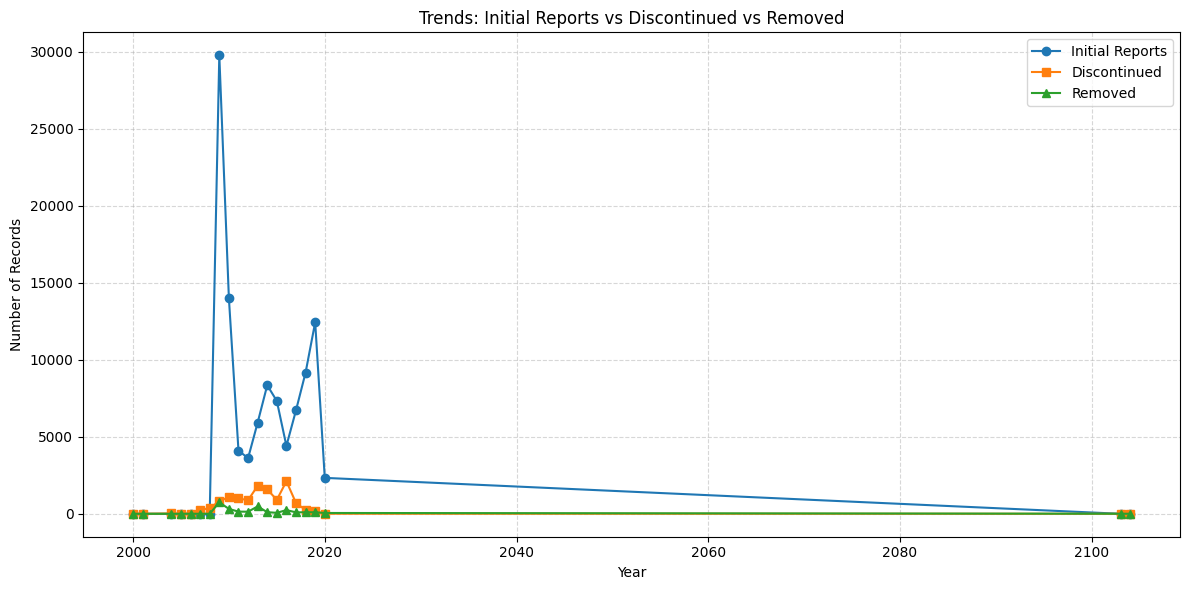

In [21]:
trend_initial = df["Year_Initial"].value_counts().sort_index()
trend_discontinued = df.loc[df["Year_Discontinued"] > 0, "Year_Discontinued"].value_counts().sort_index()
trend_removed = df.loc[df["Year_Removed"] > 0, "Year_Removed"].value_counts().sort_index()

years = sorted(set(trend_initial.index) | set(trend_discontinued.index) | set(trend_removed.index))

y_init = [trend_initial.get(y, 0) for y in years]
y_disc = [trend_discontinued.get(y, 0) for y in years]
y_rem  = [trend_removed.get(y, 0) for y in years]

plt.figure(figsize=(12,6))
plt.plot(years, y_init, marker="o", label="Initial Reports")
plt.plot(years, y_disc, marker="s", label="Discontinued")
plt.plot(years, y_rem,  marker="^", label="Removed")
plt.title("Trends: Initial Reports vs Discontinued vs Removed")
plt.xlabel("Year"); plt.ylabel("Number of Records")
plt.grid(True, linestyle="--", alpha=0.5); plt.legend()
plt.tight_layout(); plt.show()



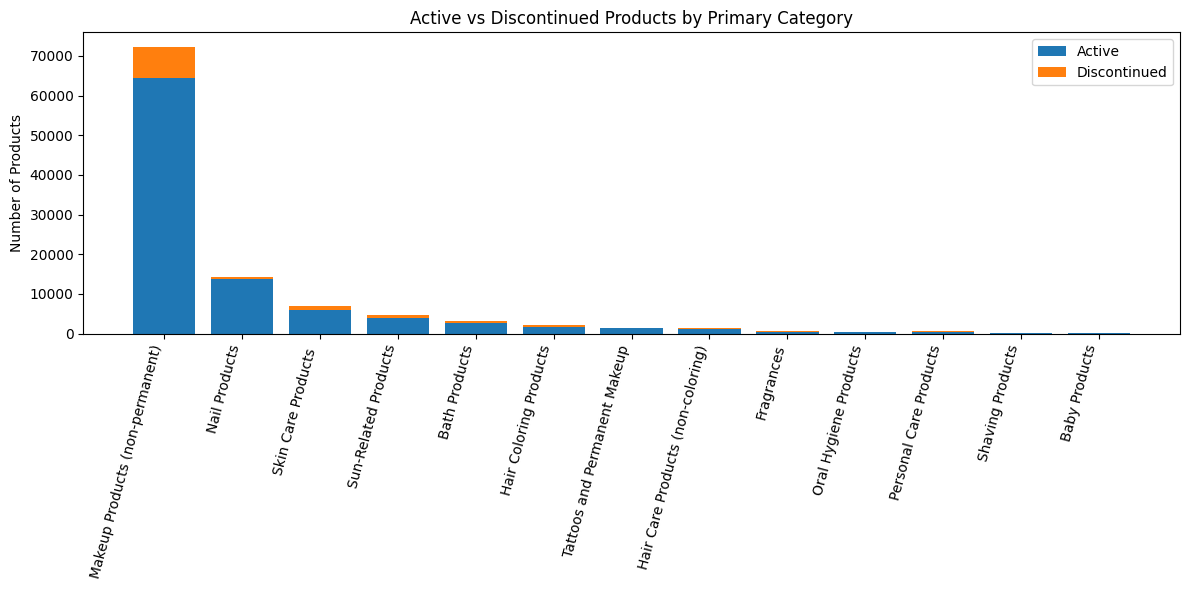

In [22]:
# tacked bar by category (Active vs Discontinued)
import pandas as pd
import matplotlib.pyplot as plt

cat_tbl = (df.groupby("PrimaryCategory")["Is_Discontinued"]
             .value_counts()
             .unstack(fill_value=0)
             .rename(columns={0:"Active", 1:"Discontinued"})
             .sort_values("Active", ascending=False))

plt.figure(figsize=(12,6))
bottom = None
for col in ["Active", "Discontinued"]:
    vals = cat_tbl[col].values
    plt.bar(cat_tbl.index, vals, bottom=bottom, label=col)
    bottom = vals if bottom is None else bottom + vals

plt.title("Active vs Discontinued Products by Primary Category")
plt.ylabel("Number of Products"); plt.xticks(rotation=75, ha="right")
plt.legend(); plt.tight_layout(); plt.show()


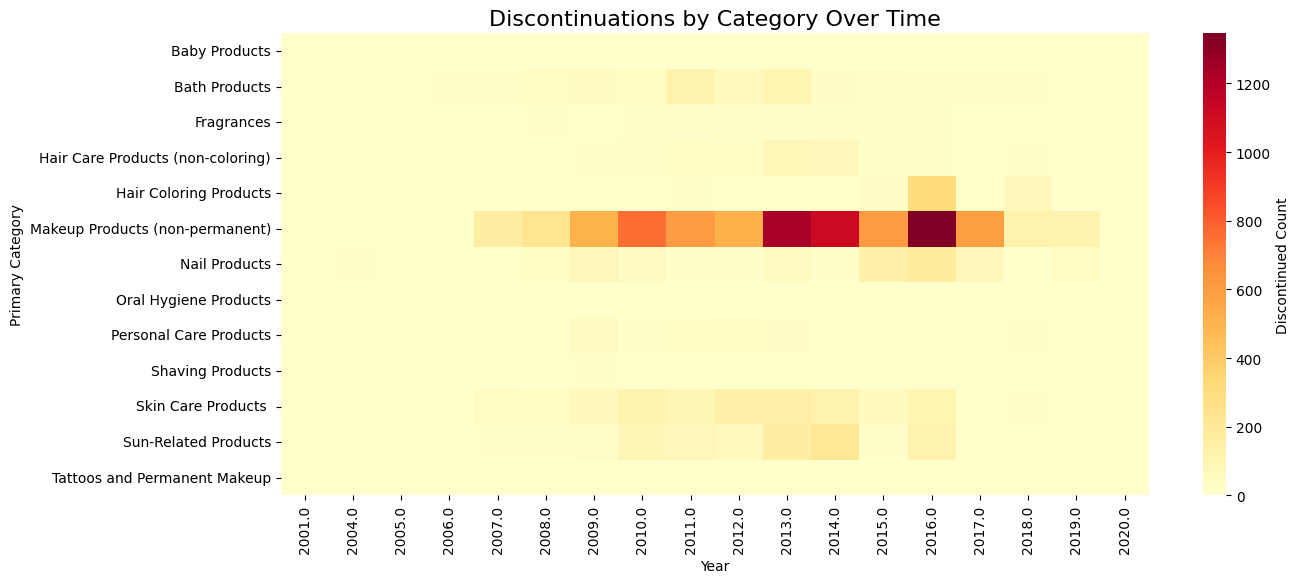

In [23]:
pivot = (df[df["Is_Discontinued"]==1]
         .groupby(["PrimaryCategory","Year_Discontinued"])
         .size()
         .unstack(fill_value=0))

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap="YlOrRd", cbar_kws={'label': 'Discontinued Count'})
plt.title("Discontinuations by Category Over Time", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Primary Category")
plt.show()

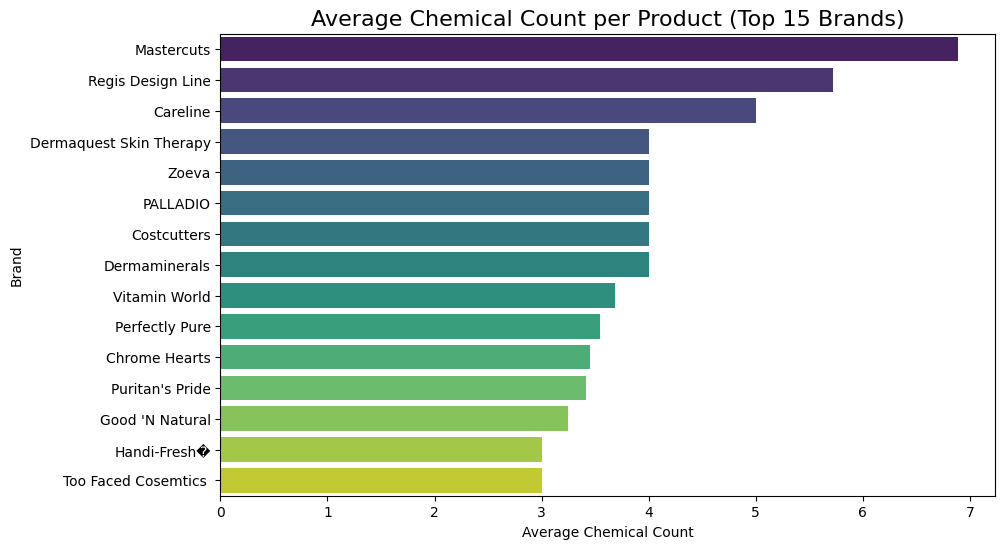

In [24]:
brand_avg = df.groupby("BrandName")["ChemicalCount"].mean().sort_values(ascending=False).head(15)

brand_avg_df = brand_avg.reset_index()
brand_avg_df.columns = ["BrandName","AvgChemicalCount"]

plt.figure(figsize=(10,6))
sns.barplot(
    data=brand_avg_df,
    x="AvgChemicalCount", y="BrandName",
    hue="BrandName",
    dodge=False, legend=False,
    palette="viridis"
)
plt.title("Average Chemical Count per Product (Top 15 Brands)", fontsize=16)
plt.xlabel("Average Chemical Count")
plt.ylabel("Brand")
plt.show()

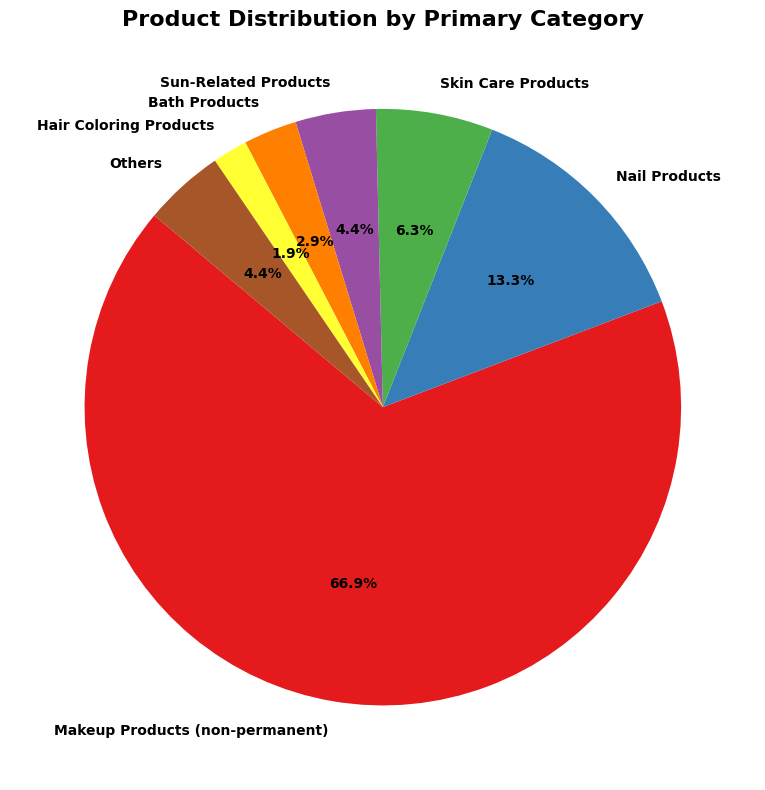

In [25]:
# Pie chart
cat_dist = df["PrimaryCategory"].value_counts()

# Take top 6 categories, group the rest into "Others"
top_cats = cat_dist.head(6)
others = pd.Series(cat_dist.iloc[6:].sum(), index=["Others"])
cat_final = pd.concat([top_cats, others])

plt.figure(figsize=(8,8))
colors = sns.color_palette("Set1", len(cat_final))
plt.pie(
    cat_final.values,
    labels=cat_final.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={"fontsize": 10, "weight":"bold"}
)

plt.title("Product Distribution by Primary Category", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()

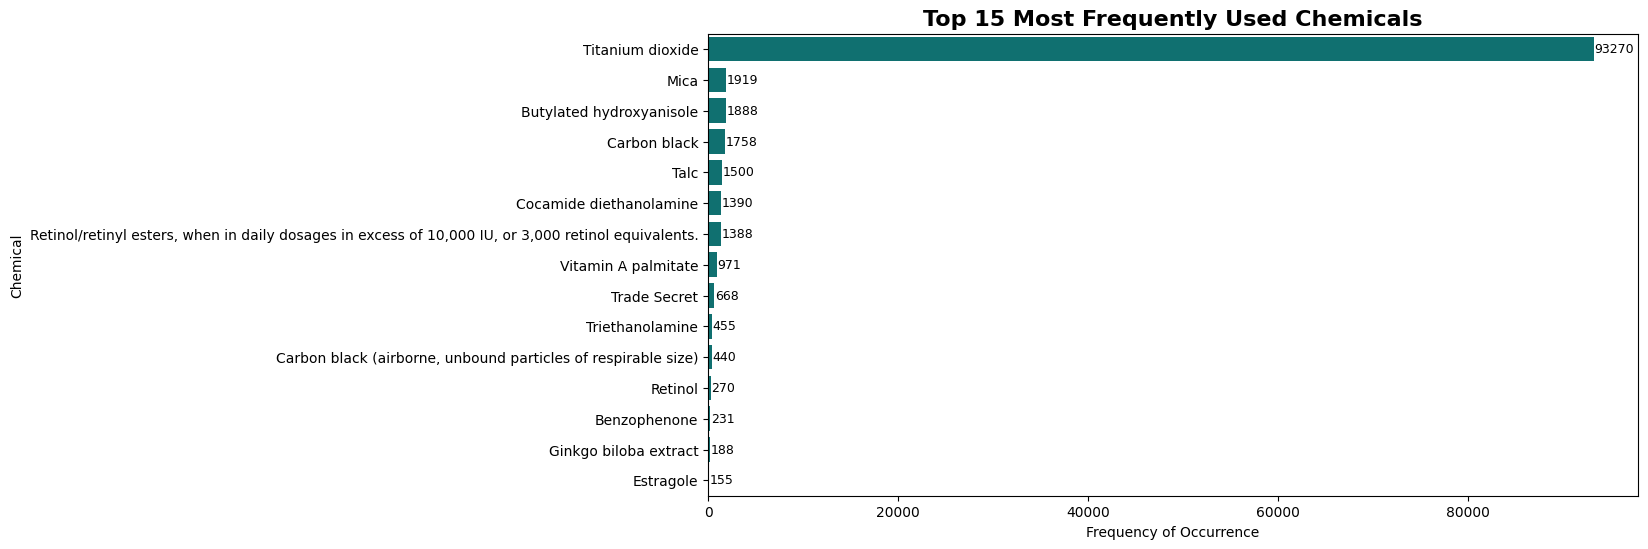

In [26]:
chem_freq = df["ChemicalName"].value_counts().head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=chem_freq.values, y=chem_freq.index, color="teal")
plt.title("Top 15 Most Frequently Used Chemicals", fontsize=16, weight="bold")
plt.xlabel("Frequency of Occurrence")
plt.ylabel("Chemical")
for i, v in enumerate(chem_freq.values):
    plt.text(v+50, i, str(v), va="center", fontsize=9)
plt.show()

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108159 entries, 0 to 114634
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   CDPHId                  108159 non-null  int64         
 1   ProductName             108159 non-null  object        
 2   CSFId                   108159 non-null  int64         
 3   CSF                     108159 non-null  object        
 4   CompanyId               108159 non-null  int64         
 5   CompanyName             108159 non-null  object        
 6   BrandName               108159 non-null  object        
 7   PrimaryCategoryId       108159 non-null  int64         
 8   PrimaryCategory         108159 non-null  object        
 9   SubCategoryId           108159 non-null  int64         
 10  SubCategory             108159 non-null  object        
 11  CasId                   108159 non-null  int64         
 12  CasNumber               108159 non-

### **Data Transformation**

In [28]:
# Drop all ID columns (unique identifiers, not useful for modeling)
id_cols = [
    "CDPHId", "CSFId", "CompanyId",
    "PrimaryCategoryId", "SubCategoryId",
    "CasId", "ChemicalId"
]

df = df.drop(columns=id_cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108159 entries, 0 to 114634
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             108159 non-null  object        
 1   CSF                     108159 non-null  object        
 2   CompanyName             108159 non-null  object        
 3   BrandName               108159 non-null  object        
 4   PrimaryCategory         108159 non-null  object        
 5   SubCategory             108159 non-null  object        
 6   CasNumber               108159 non-null  object        
 7   ChemicalName            108159 non-null  object        
 8   InitialDateReported     108159 non-null  datetime64[ns]
 9   MostRecentDateReported  108159 non-null  datetime64[ns]
 10  DiscontinuedDate        11978 non-null   datetime64[ns]
 11  ChemicalCreatedAt       108159 non-null  datetime64[ns]
 12  ChemicalUpdatedAt       108159 non-

In [29]:
# Drop CompanyName
df = df.drop(columns=["CompanyName"])

# Keep Top 9 ProductName, group rest as "Other"
top_products = df["ProductName"].value_counts().nlargest(9).index
df["ProductName"] = df["ProductName"].where(df["ProductName"].isin(top_products), "Other")

# Keep Top 9 BrandName, group rest as "Other"
top_brands = df["BrandName"].value_counts().nlargest(9).index
df["BrandName"] = df["BrandName"].where(df["BrandName"].isin(top_brands), "Other")

# Keep Top 9 ChemicalName, group rest as "Other"
top_chems = df["ChemicalName"].value_counts().nlargest(9).index
df["ChemicalName"] = df["ChemicalName"].where(df["ChemicalName"].isin(top_chems), "Other")

print("Unique Product Names:", df["ProductName"].nunique())
print("Unique Brand Names:", df["BrandName"].nunique())
print("Unique ChemicalName:", df["ChemicalName"].nunique())
print("Unique PrimaryCategory:", df["PrimaryCategory"].nunique())#

Unique Product Names: 10
Unique Brand Names: 10
Unique ChemicalName: 10
Unique PrimaryCategory: 13


In [30]:
pair_counts = (
    df.groupby(["PrimaryCategory", "SubCategory"])
      .size()
      .reset_index(name="cnt")
)

# For each PrimaryCategory, keep top 5 SubCategory by count
top5_pairs = (
    pair_counts.sort_values(["PrimaryCategory", "cnt"], ascending=[True, False])
               .groupby("PrimaryCategory", as_index=False)
               .head(5)[["PrimaryCategory", "SubCategory"]]
               .assign(keep=1)
)

df = df.merge(top5_pairs, how="left", on=["PrimaryCategory", "SubCategory"])

df["SubCategory"] = np.where(df["keep"].eq(1), df["SubCategory"], "Other")

df = df.drop(columns=["keep"])

print("Unique SubCategories after grouping:", df["SubCategory"].nunique())
print(df["SubCategory"].value_counts().head(15))

Unique SubCategories after grouping: 58
SubCategory
Lip Color - Lipsticks, Liners, and Pencils                    15855
Other                                                         15369
Eye Shadow                                                    14912
Foundations and Bases                                         13496
Nail Polish and Enamel                                         9522
Lip Gloss/Shine                                                8562
Eyeliner/Eyebrow Pencils                                       5747
Sunscreen (making a cosmetic claim)                            4357
Skin Moisturizers (making a cosmetic claim)                    3038
UV Gel Nail Polish                                             3007
Body Washes and Soaps                                          2032
Hair Dyes and Colors                                           1620
Tattoos and Permanent Makeup                                   1477
Artificial Nails and Related Products                          1

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             108159 non-null  object        
 1   CSF                     108159 non-null  object        
 2   BrandName               108159 non-null  object        
 3   PrimaryCategory         108159 non-null  object        
 4   SubCategory             108159 non-null  object        
 5   CasNumber               108159 non-null  object        
 6   ChemicalName            108159 non-null  object        
 7   InitialDateReported     108159 non-null  datetime64[ns]
 8   MostRecentDateReported  108159 non-null  datetime64[ns]
 9   DiscontinuedDate        11978 non-null   datetime64[ns]
 10  ChemicalCreatedAt       108159 non-null  datetime64[ns]
 11  ChemicalUpdatedAt       108159 non-null  datetime64[ns]
 12  ChemicalDateRemoved     2583 n

In [32]:
vals = sorted(df["CSF"].dropna().astype(str).unique(), key=lambda s: s.lower())
print(f"Total unique CSF values: {len(vals)}\n")

Total unique CSF values: 34084



Very high cardinality, hence dropping the column.

In [33]:
df.drop(columns=["CSF"], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             108159 non-null  object        
 1   BrandName               108159 non-null  object        
 2   PrimaryCategory         108159 non-null  object        
 3   SubCategory             108159 non-null  object        
 4   CasNumber               108159 non-null  object        
 5   ChemicalName            108159 non-null  object        
 6   InitialDateReported     108159 non-null  datetime64[ns]
 7   MostRecentDateReported  108159 non-null  datetime64[ns]
 8   DiscontinuedDate        11978 non-null   datetime64[ns]
 9   ChemicalCreatedAt       108159 non-null  datetime64[ns]
 10  ChemicalUpdatedAt       108159 non-null  datetime64[ns]
 11  ChemicalDateRemoved     2583 non-null    datetime64[ns]
 12  ChemicalCount           108159

In [34]:
df["CasNumber"].unique()

array(['13463-67-7', '65996-92-1', '140-67-0', '68603-42-9', '108-88-3',
       '68-26-8', '79-81-2', '11103-57-4', '25013-16-5', '84650-00-0',
       '120-40-1', '1333-86-4', '57-83-0', '93-15-2', '90-43-7',
       '79-06-1', '50-00-0', '90045-36-6', '1317-70-0', '12001-26-2',
       '107-21-1', '127-47-9', '140-88-5', '68155-06-6', '0', '67-56-1',
       '446-72-0', '661791-31-9', '111-42-2', '139-96-8', '301-04-2',
       '14807-96-6', '102-71-6', '13463-67-7 ', '95-54-5', '94-59-7',
       '100-42-5', '75-07-0', '123-91-1', '79-43-6', '75-21-8',
       '7439-92-1', '75-09-2', '71-43-2', '100-44-7', '62-75-9',
       '75-56-9', '74-87-3', '7440-43-10', '872-50-4', '79812', '84-74-2',
       '79-818-2', '201-228-5', '91-22-5', '463-57-0', '119-61-9',
       '98084-96-9', '79-91-2', '81-15-2', '50-78-2', '8007-45-2',
       '8002-45-2', '11103-57-438', '11103-57-538', '131-57-7',
       '14808-60-7', 'CAS#79-81-2', 'CAS #79-81-2', 'CAS # 79-81-',
       '79-8-12', '61791-31-9', '7789-

In [35]:
# --- patterns & checksum ---
CAS_FULL_RE = re.compile(r"^(\d{2,7})-(\d{2})-(\d)$")
CAS_BODY_RE = re.compile(r"^(\d{2,7})-(\d{2})$")

def cas_checksum(body_digits: str) -> int:
    rev = body_digits[::-1]
    return sum((i+1) * int(d) for i, d in enumerate(rev)) % 10

def normalize_cas(s: str):
    """Normalize to A-BB-C; fix/add check digit when possible; else return NaN."""
    if pd.isna(s):
        return np.nan
    s = str(s).strip()
    s = re.sub(r"[^0-9\-]", "", s)
    s = re.sub(r"-{2,}", "-", s).strip("-")
    # A-BB-C -> correct checksum if needed
    m = CAS_FULL_RE.match(s)
    if m:
        a, b, _ = m.groups()
        c_true = cas_checksum(a + b)
        return f"{int(a)}-{b}-{c_true}"
    # A-BB -> compute & append check digit
    m = CAS_BODY_RE.match(s)
    if m:
        a, b = m.groups()
        c_true = cas_checksum(a + b)
        return f"{int(a)}-{b}-{c_true}"
    # digits only -> try to reinsert hyphens
    digits = re.sub(r"\D", "", s)
    if len(digits) >= 3:
        a, b = digits[:-3], digits[-3:-1]
        if len(a) >= 2:
            c_true = cas_checksum(a + b)
            return f"{int(a)}-{b}-{c_true}"
    return np.nan

# Normalize
df["CAS_Normalized"] = df["CasNumber"].apply(normalize_cas)
df["CAS_IsValid"] = df["CAS_Normalized"].notna()

# Impute from dominant CAS per ChemicalName
dominant_cas = (
    df.loc[df["CAS_IsValid"]]
      .groupby("ChemicalName")["CAS_Normalized"]
      .agg(lambda s: s.value_counts().idxmax())
      .to_dict()
)
mask_fill = (~df["CAS_IsValid"]) & df["ChemicalName"].isin(dominant_cas)
df.loc[mask_fill, "CAS_Normalized"] = df.loc[mask_fill, "ChemicalName"].map(dominant_cas)
df["CAS_IsValid"] = df["CAS_Normalized"].notna()

# Compact numeric signals
valid = df["CAS_IsValid"]
cas_freq = df.loc[valid, "CAS_Normalized"].value_counts()
cas_brand_nuniq = df.loc[valid].groupby("CAS_Normalized")["BrandName"].nunique()
cas_cat_nuniq   = df.loc[valid].groupby("CAS_Normalized")["PrimaryCategory"].nunique()

df["CAS_Global_Freq"]   = df["CAS_Normalized"].map(cas_freq).fillna(0).astype(int)
df["CAS_Brand_Unique"]  = df["CAS_Normalized"].map(cas_brand_nuniq).fillna(0).astype(int)
df["CAS_Cat_Unique"]    = df["CAS_Normalized"].map(cas_cat_nuniq).fillna(0).astype(int)

# log1p versions (useful for linear models)
df["CAS_Global_Freq_log1p"]  = np.log1p(df["CAS_Global_Freq"])
df["CAS_Brand_Unique_log1p"] = np.log1p(df["CAS_Brand_Unique"])
df["CAS_Cat_Unique_log1p"]   = np.log1p(df["CAS_Cat_Unique"])

print("CAS normalized; invalid now:", (~df['CAS_IsValid']).sum())

CAS normalized; invalid now: 668


In [36]:
data_cols = ["Year_Discontinued","Year_Removed",
             "DiscontinuedDate","ChemicalDateRemoved"]
df = df.drop(columns=[c for c in data_cols if c in df.columns], errors="ignore")

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ProductName             108159 non-null  object        
 1   BrandName               108159 non-null  object        
 2   PrimaryCategory         108159 non-null  object        
 3   SubCategory             108159 non-null  object        
 4   CasNumber               108159 non-null  object        
 5   ChemicalName            108159 non-null  object        
 6   InitialDateReported     108159 non-null  datetime64[ns]
 7   MostRecentDateReported  108159 non-null  datetime64[ns]
 8   ChemicalCreatedAt       108159 non-null  datetime64[ns]
 9   ChemicalUpdatedAt       108159 non-null  datetime64[ns]
 10  ChemicalCount           108159 non-null  int64         
 11  Is_Discontinued         108159 non-null  int64         
 12  Is_Removed              108159

In [38]:
def days_between(later, earlier):
    d = (later - earlier).dt.days
    return d.where(d >= 0, 0)

for c in ["InitialDateReported","MostRecentDateReported","ChemicalCreatedAt","ChemicalUpdatedAt"]:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors="coerce")

df["product_age_days"] = days_between(df["MostRecentDateReported"], df["InitialDateReported"]).fillna(0).astype(int)
df["report_lag_days"]  = days_between(df["ChemicalCreatedAt"], df["InitialDateReported"]).fillna(0).astype(int)
df["update_lag_days"]  = days_between(df["ChemicalUpdatedAt"], df["ChemicalCreatedAt"]).fillna(0).astype(int)

raw_dates = ["InitialDateReported","MostRecentDateReported","ChemicalCreatedAt","ChemicalUpdatedAt"]
df = df.drop(columns=[c for c in raw_dates if c in df.columns], errors="ignore")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductName             108159 non-null  object 
 1   BrandName               108159 non-null  object 
 2   PrimaryCategory         108159 non-null  object 
 3   SubCategory             108159 non-null  object 
 4   CasNumber               108159 non-null  object 
 5   ChemicalName            108159 non-null  object 
 6   ChemicalCount           108159 non-null  int64  
 7   Is_Discontinued         108159 non-null  int64  
 8   Is_Removed              108159 non-null  int64  
 9   Year_Initial            108159 non-null  int32  
 10  Year_Recent             108159 non-null  int32  
 11  CAS_Normalized          107491 non-null  object 
 12  CAS_IsValid             108159 non-null  bool   
 13  CAS_Global_Freq         108159 non-null  int64  
 14  CAS_Brand_Unique    

In [40]:
cat_cols = [c for c in ["ProductName","BrandName","PrimaryCategory","SubCategory","ChemicalName"] if c in df.columns]
df = pd.get_dummies(df, columns=cat_cols, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Columns: 118 entries, CasNumber to ChemicalName_Vitamin A palmitate
dtypes: bool(102), float64(3), int32(2), int64(9), object(2)
memory usage: 22.9+ MB


In [41]:
# CAS: bucket top-20 normalized codes, add dummies, and drop raw CasNumber
TOP_N = 20
top_cas = df["CAS_Normalized"].value_counts().head(TOP_N).index

df["CAS_Bucket"] = np.where(
    df["CAS_Normalized"].isna(), "Invalid/Missing",
    np.where(df["CAS_Normalized"].isin(top_cas), df["CAS_Normalized"], "Other")
)

cas_dum = pd.get_dummies(df["CAS_Bucket"], prefix="CAS", drop_first=False)

df = df.drop(columns=[c for c in df.columns if c == "CasNumber" or c.startswith("CasNumber_")], errors="ignore")
df = pd.concat([df, cas_dum], axis=1)

print("Added CAS bucket dummies:", list(cas_dum.columns)[:5], "...")

Added CAS bucket dummies: ['CAS_102-71-6', 'CAS_108-88-3', 'CAS_11103-57-4', 'CAS_119-61-9', 'CAS_12001-26-2'] ...


In [42]:
df = df.drop(['CAS_Normalized', 'CAS_IsValid', 'CAS_Bucket'], axis=1)

In [43]:
df.drop(columns=[c for c in ["CAS_Global_Freq","CAS_Brand_Unique","CAS_Cat_Unique"] if c in df.columns],
       inplace=True, errors="ignore")

In [44]:
feature_list = df.columns.tolist()
print(feature_list)

['ChemicalCount', 'Is_Discontinued', 'Is_Removed', 'Year_Initial', 'Year_Recent', 'CAS_Global_Freq_log1p', 'CAS_Brand_Unique_log1p', 'CAS_Cat_Unique_log1p', 'product_age_days', 'report_lag_days', 'update_lag_days', 'ProductName_BLACK LABEL LIPSTICK', 'ProductName_Eye Shadow', 'ProductName_Eyecolor', 'ProductName_NARS Single Eyeshadow', 'ProductName_NYX GIRLS NAIL POLISH', 'ProductName_Nail Lacquer', 'ProductName_Other', 'ProductName_Permanent Cosmetics Color', 'ProductName_ROUND LIPSTICK', 'ProductName_SEPHORA - COLORFUL OMBRE A PAUPIERES DECLIPSABLE / COLORFUL REMOVABLE EYESHADOW PAN', 'BrandName_NARS', 'BrandName_NYX', 'BrandName_Other', 'BrandName_Revlon', 'BrandName_SEPHORA', 'BrandName_Sally Hansen', 'BrandName_Sephora ', "BrandName_Victoria's Secret Beauty", 'BrandName_bareMinerals', 'BrandName_tarte', 'PrimaryCategory_Baby Products', 'PrimaryCategory_Bath Products', 'PrimaryCategory_Fragrances', 'PrimaryCategory_Hair Care Products (non-coloring)', 'PrimaryCategory_Hair Coloring 

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Columns: 134 entries, ChemicalCount to CAS_Other
dtypes: bool(123), float64(3), int32(2), int64(6)
memory usage: 20.9 MB


In [46]:
y = df[['Is_Discontinued', 'Is_Removed']]
X = df.drop(['Is_Discontinued', 'Is_Removed'], axis=1)
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Columns: 132 entries, ChemicalCount to CAS_Other
dtypes: bool(123), float64(3), int32(2), int64(4)
memory usage: 19.3 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108159 entries, 0 to 108158
Data columns (total 2 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Is_Discontinued  108159 non-null  int64
 1   Is_Removed       108159 non-null  int64
dtypes: int64(2)
memory usage: 1.7 MB
None


### **Modeling**

In [47]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

y1 = df[['Is_Discontinued']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y1, test_size=0.20, random_state=42, stratify=y1
)

scaler = MinMaxScaler()

# Fit scaler
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### **Research Question - 01**

For a given product–chemical record, what is the probability the product is discontinued?

Feature Set: All features in dataset.
Target (y1): Is_Discontinued (1 = discontinued, 0 = not)

#### Model 1 - Logistic Regression

In [48]:
# RQ1 — Baseline Logistic Regression

# import numpy as np
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedKFold, GridSearchCV
# from sklearn.metrics import (
#     roc_auc_score, average_precision_score,
#     classification_report, confusion_matrix, precision_recall_curve
# )

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# logit = LogisticRegression(
#     penalty="l2",
#     solver="saga",            # good for many features
#     class_weight="balanced",  # handle class imbalance
#     max_iter=5000,
#     random_state=42
# )

# grid = GridSearchCV(
#     estimator=logit,
#     param_grid={"C": [0.1, 1.0]},
#     scoring={"roc_auc": "roc_auc", "pr_auc": "average_precision"},
#     refit="pr_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=0
# )

# grid.fit(X_train_scaled, y_train)

# best = grid.best_estimator_
# proba = best.predict_proba(X_test_scaled)[:, 1]

# # Metrics
# roc = roc_auc_score(y_test, proba)
# pr  = average_precision_score(y_test, proba)

# # Choose threshold that maximizes F1
# prec, rec, thr = precision_recall_curve(y_test, proba)
# f1 = (2 * prec * rec) / (prec + rec + 1e-12)  # numeric safety
# t_best = thr[f1[:-1].argmax()] if len(thr) else 0.5  # f1 has one extra element
# y_pred = (proba >= t_best).astype(int)

# print("Best params:", grid.best_params_)
# print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr:.3f} | Best F1: {f1[:-1].max():.3f} @ thr={t_best:.3f}\n")
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

Logistics Regression Results:
Best params: {'C': 10.0}
ROC-AUC: 0.883 | PR-AUC: 0.415 | Best F1: 0.571 @ thr=0.584





Logistic Regression Results:
Best params: {'C': 10.0}
ROC-AUC: 0.883 | PR-AUC: 0.415 | Best F1: 0.571 @ thr=0.584

Confusion Matrix:
 [[16893  2343]
 [  501  1895]]

Classification Report:
               precision    recall  f1-score   support

           0      0.971     0.878     0.922     19236
           1      0.447     0.791     0.571      2396

    accuracy                          0.869     21632
   macro avg      0.709     0.835     0.747     21632
weighted avg      0.913     0.869     0.883     21632



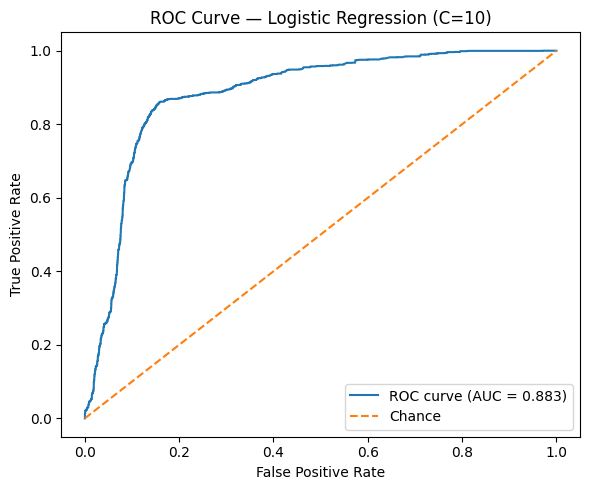

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve
)

# --- Best Logistic Regression model---
best = LogisticRegression(
    C=10.0,
    penalty="l2",
    solver="saga",
    class_weight="balanced",
    max_iter=5000,
    random_state=42
)

# Fit on training data
best.fit(X_train_scaled, y_train)

# Predict probabilities
proba = best.predict_proba(X_test_scaled)[:, 1]

# Metrics
roc = roc_auc_score(y_test, proba)
pr  = average_precision_score(y_test, proba)

# Find best F1 threshold
prec, rec, thr = precision_recall_curve(y_test, proba)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
t_best = thr[f1[:-1].argmax()] if len(thr) else 0.5
y_pred = (proba >= t_best).astype(int)

print("Logistic Regression Results:")
print("Best params: {'C': 10.0}")
print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr:.3f} | Best F1: {f1[:-1].max():.3f} @ thr={t_best:.3f}\n")

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# --- ROC curve ---
fpr, tpr, _ = roc_curve(y_test, proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Logistic Regression (C=10)")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Model 2 - Random Forest Classification

In [50]:
# # Random Forest: GridSearchCV to get best params (scaled data only)

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV

# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# rf = RandomForestClassifier(
#     class_weight="balanced_subsample",
#     n_jobs=-1,
#     random_state=42
# )

# param_grid = {
#     "n_estimators": [300, 500],
#     "max_depth": [None, 20, 40],
#     "max_features": ["sqrt", 0.5],
#     "min_samples_leaf": [1, 2]
# }

# grid_rf = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     scoring={"roc_auc": "roc_auc", "pr_auc": "average_precision"},
#     refit="pr_auc",
#     cv=cv,
#     n_jobs=-1,
#     verbose=0
# )

# grid_rf.fit(X_train_scaled, y_train)

# print("Best params")
# print(grid_rf.best_params_)

# print("Best CV PR-AUC:", grid_rf.best_score_)

Best params (use these for model):
{'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'n_estimators': 500}
Best CV PR-AUC: 0.9577886369104919

Random Forest — tuned best model
ROC-AUC: 0.993 | PR-AUC: 0.963 | Best F1: 0.907 @ thr=0.740

Confusion Matrix:
 [[19064   172]
 [  266  2130]]

Classification Report:
               precision    recall  f1-score   support

           0      0.986     0.991     0.989     19236
           1      0.925     0.889     0.907      2396

    accuracy                          0.980     21632
   macro avg      0.956     0.940     0.948     21632
weighted avg      0.979     0.980     0.980     21632



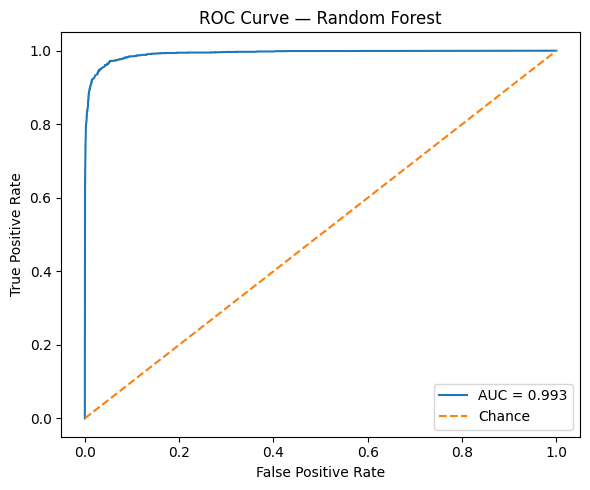

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

best_rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=None,
    max_features=0.5,
    min_samples_leaf=2,
    class_weight="balanced_subsample",
    n_jobs=-1,
    random_state=42
)

best_rf.fit(X_train_scaled, y_train)
proba = best_rf.predict_proba(X_test_scaled)[:, 1]

roc = roc_auc_score(y_test, proba)
pr  = average_precision_score(y_test, proba)

prec, rec, thr = precision_recall_curve(y_test, proba)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
t_best = thr[np.argmax(f1[:-1])] if len(thr) else 0.5
y_pred = (proba >= t_best).astype(int)

print("Random Forest — tuned best model")
print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr:.3f} | Best F1: {f1[:-1].max():.3f} @ thr={t_best:.3f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — Random Forest")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

#### Model 3 - Xg Boost Classifier

In [52]:
# # XGBoost: GridSearchCV to get best params (scaled data only)

# from xgboost import XGBClassifier
# from sklearn.model_selection import StratifiedKFold, GridSearchCV

# # 3-fold CV
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# # Handle imbalance via scale_pos_weight = #neg / #pos
# import numpy as np
# neg = (y_train == 0).sum()
# pos = (y_train == 1).sum()
# spw = neg / max(pos, 1)

# xgb = XGBClassifier(
#     objective="binary:logistic",
#     tree_method="hist",
#     n_jobs=1,
#     random_state=42,
#     scale_pos_weight=spw,
#     eval_metric="aucpr"
# )

# param_grid = {
#     "n_estimators": [300, 600],
#     "max_depth": [4, 6, 8],
#     "learning_rate": [0.05, 0.1],
#     "subsample": [0.8, 1.0],
#     "colsample_bytree": [0.8, 1.0],
#     "reg_lambda": [1.0, 3.0]   # L2
# }

# grid_xgb = GridSearchCV(
#     estimator=xgb,
#     param_grid=param_grid,
#     scoring={"roc_auc": "roc_auc", "pr_auc": "average_precision"},
#     refit="pr_auc",
#     cv=cv,
#     n_jobs=2,
#     verbose=0
# )

# grid_xgb.fit(X_train_scaled, y_train)

# print("Best params:")
# print(grid_xgb.best_params_)
# print("Best CV PR-AUC:", grid_xgb.best_score_)

Best params:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600, 'reg_lambda': 3.0, 'subsample': 0.8}
Best CV PR-AUC: 0.9506381772637503

XGBoost — tuned best model
Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600, 'reg_lambda': 3.0, 'subsample': 0.8}
ROC-AUC: 0.992 | PR-AUC: 0.959 | Best F1: 0.898 @ thr=0.788

Confusion Matrix:
 [[18974   262]
 [  229  2167]]

Classification Report:
               precision    recall  f1-score   support

           0      0.988     0.986     0.987     19236
           1      0.892     0.904     0.898      2396

    accuracy                          0.977     21632
   macro avg      0.940     0.945     0.943     21632
weighted avg      0.977     0.977     0.977     21632



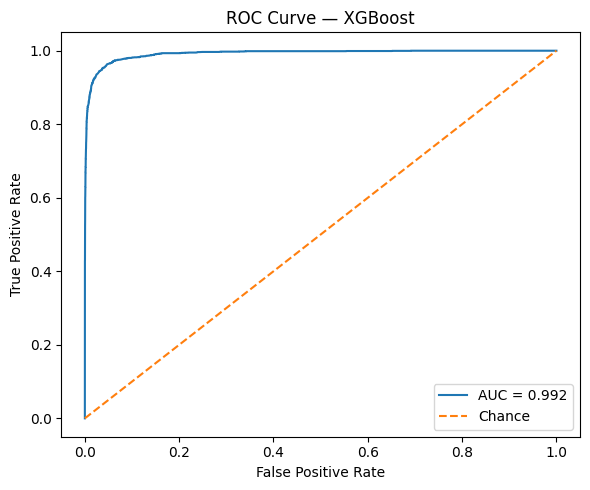

In [53]:
from xgboost import XGBClassifier
from sklearn.metrics import (
    roc_auc_score, average_precision_score,
    classification_report, confusion_matrix,
    roc_curve, precision_recall_curve
)
import matplotlib.pyplot as plt
import numpy as np

# Recompute imbalance weight on the current train split
neg = int((y_train == 0).sum())
pos = int((y_train == 1).sum())
spw = neg / max(pos, 1)

best_xgb = XGBClassifier(
    objective="binary:logistic",
    tree_method="hist",
    eval_metric="aucpr",
    n_estimators=600,
    max_depth=8,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=1.0,
    reg_lambda=3.0,
    scale_pos_weight=spw,
    n_jobs=-1,
    random_state=42
)

best_xgb.fit(X_train_scaled, y_train)
proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

roc = roc_auc_score(y_test, proba)
pr  = average_precision_score(y_test, proba)

prec, rec, thr = precision_recall_curve(y_test, proba)
f1 = (2 * prec * rec) / (prec + rec + 1e-12)
t_best = thr[np.argmax(f1[:-1])] if len(thr) else 0.5
y_pred = (proba >= t_best).astype(int)

print("XGBoost — tuned best model")
print("Best params: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 600, 'reg_lambda': 3.0, 'subsample': 0.8}")
print(f"ROC-AUC: {roc:.3f} | PR-AUC: {pr:.3f} | Best F1: {f1[:-1].max():.3f} @ thr={t_best:.3f}\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=3))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Chance")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve — XGBoost")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Best Model: XgBoost

### **Research Question - 02: **
Brand & Category Safety Index (Adjusted Risk)

After controlling for chemical mix, CAS prevalence, and time, which brands and primary categories show higher adjusted discontinuation risk?

Output:


*   Top-N brands by adjusted risk
*   Top-N primary categories by adjusted risk
*   Bar charts for the two Safety Index rankings

In [54]:
import shap


explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_train_scaled)

shap_df = pd.DataFrame(shap_values, columns=X_train_scaled.columns)


Top Risky Brands (Adjusted Risk)


,0
BrandName_Victoria's Secret Beauty,-0.007977
BrandName_Revlon,-0.021644
BrandName_Sephora,-0.032222
BrandName_tarte,-0.033876
BrandName_Sally Hansen,-0.041756
BrandName_bareMinerals,-0.046627
BrandName_SEPHORA,-0.047388
BrandName_NYX,-0.050808
BrandName_NARS,-0.056594
BrandName_Other,-0.237108



Top Risky Primary Categories


,0
PrimaryCategory_Baby Products,-0.000015
PrimaryCategory_Bath Products,-0.000748
PrimaryCategory_Fragrances,-0.001764
PrimaryCategory_Personal Care Products,-0.004904
PrimaryCategory_Oral Hygiene Products,-0.005067
PrimaryCategory_Shaving Products,-0.005160
PrimaryCategory_Sun-Related Products,-0.007981
PrimaryCategory_Hair Care Products (non-coloring),-0.010880
PrimaryCategory_Hair Coloring Products,-0.019135
PrimaryCategory_Tattoos and Permanent Makeup,-0.026822



Top Risky Subcategories


,0
SubCategory_Hair Shampoos with Anti-Dandruff properties,0.000306
SubCategory_Hair Tints and Rinses (coloring),0.000088
SubCategory_Aftershave Products,0.000070
SubCategory_Baby Shampoos,0.000000
SubCategory_Baby Skin Care,0.000000
SubCategory_Antiperspirants (making a cosmetic claim),0.000000
SubCategory_Hair Lighteners with Color,0.000000
SubCategory_Diaper Rash Treatment,0.000000
SubCategory_Baby Wash/Soap,0.000000
SubCategory_Mouthwashes and Breath Fresheners,0.000000


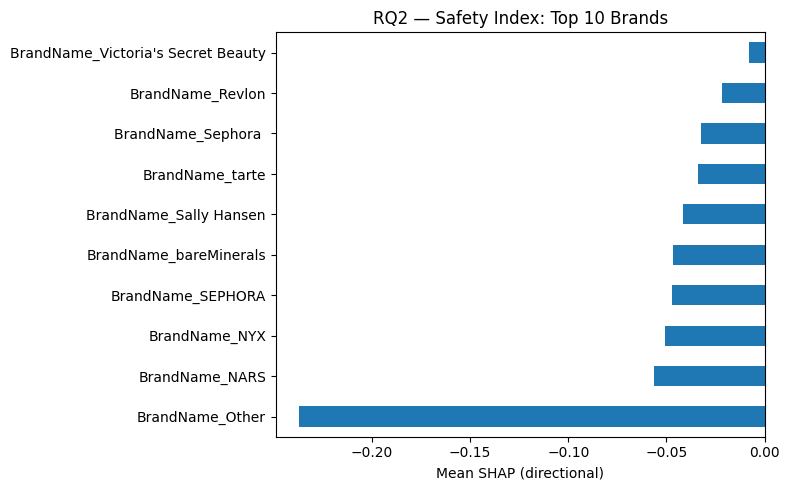

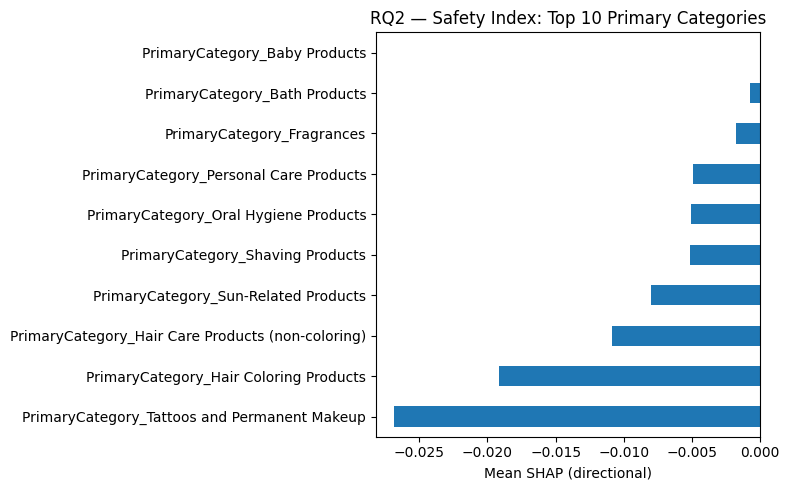

In [55]:
brand_cols = [c for c in shap_df.columns if c.startswith("BrandName_")]
pcat_cols  = [c for c in shap_df.columns if c.startswith("PrimaryCategory_")]
scat_cols  = [c for c in shap_df.columns if c.startswith("SubCategory_")]

brand_risk = shap_df[brand_cols].mean().sort_values(ascending=False)
cat_risk   = shap_df[pcat_cols].mean().sort_values(ascending=False)
subcat_risk = shap_df[scat_cols].mean().sort_values(ascending=False)


print("Top Risky Brands (Adjusted Risk)")
display(brand_risk.head(10))

print("\nTop Risky Primary Categories")
display(cat_risk.head(10))

print("\nTop Risky Subcategories")
display(subcat_risk.head(10))

plt.figure(figsize=(8,5))
brand_risk.head(10)[::-1].plot(kind="barh")
plt.title("RQ2 — Safety Index: Top 10 Brands")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
cat_risk.head(10)[::-1].plot(kind="barh")
plt.title("RQ2 — Safety Index: Top 10 Primary Categories")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()

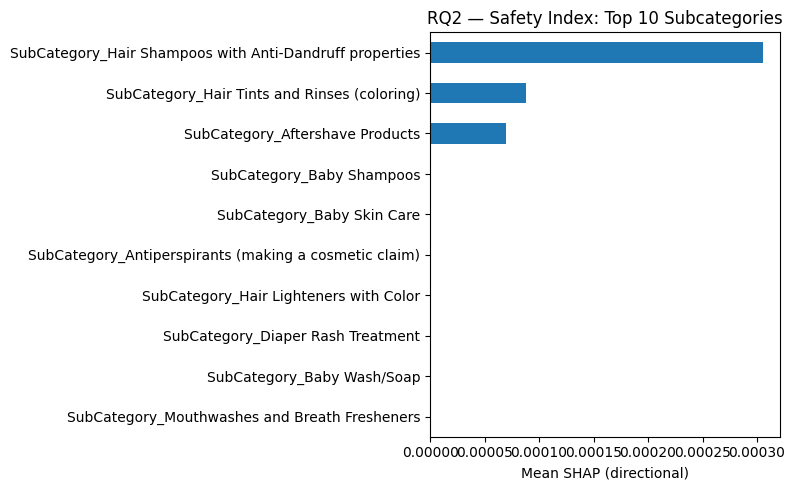

In [57]:
plt.figure(figsize=(8,5))
subcat_risk.head(10)[::-1].plot(kind="barh")
plt.title("RQ2 — Safety Index: Top 10 Subcategories")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()

### **Research Question - 03: **
Ingredient & CAS Pattern Risk

Which chemicals and CAS patterns (e.g., high global frequency, broad brand/category spread) are most associated with discontinuation?

Output:


* Ranked list of CAS signal features (e.g., CAS_Global_Freq_log1p, CAS_Brand_Unique_log1p, CAS_Cat_Unique_log1p) by adjusted risk
* Top-N CAS bucket dummies by adjusted risk.
* Top-N ChemicalName dummies by adjusted risk.

In [58]:
# CAS continuous signal columns
cas_signals = [
    "CAS_Global_Freq_log1p",
    "CAS_Brand_Unique_log1p",
    "CAS_Cat_Unique_log1p"
]

# CAS bucket dummies (but exclude the raw CAS string column)
cas_buckets = [
    c for c in shap_df.columns
    if c.startswith("CAS_")
    and c not in cas_signals
    and c != "CAS_Normalized"
]

# Chemical dummy variables
chem_cols = [c for c in shap_df.columns if c.startswith("ChemicalName_")]

In [59]:
cas_signal_risk  = shap_df[cas_signals].mean().sort_values(ascending=False)
cas_bucket_risk  = shap_df[cas_buckets].mean().sort_values(ascending=False)
chem_risk        = shap_df[chem_cols].mean().sort_values(ascending=False)

RQ3 — CAS Signal Features (Directional Mean SHAP)


,0
CAS_Brand_Unique_log1p,-0.018737
CAS_Cat_Unique_log1p,-0.023339
CAS_Global_Freq_log1p,-0.049527


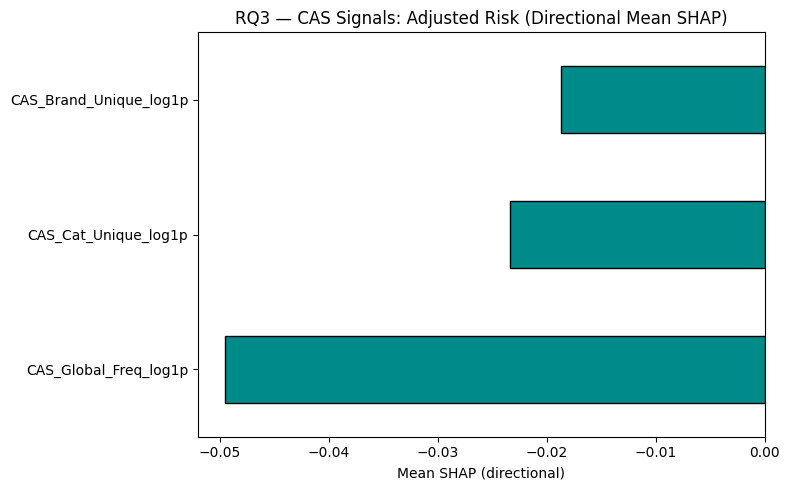


RQ3 — Top CAS Buckets (Directional Mean SHAP)


,0
CAS_1333-86-4,0.000533
CAS_84650-00-0,0.000039
CAS_12001-26-2,0.000000
CAS_25013-16-5,0.000000
CAS_108-88-3,0.000000
CAS_123-35-3,0.000000
CAS_Invalid/Missing,0.000000
CAS_14807-96-6,0.000000
CAS_13463-67-7,0.000000
CAS_140-67-0,-0.000078


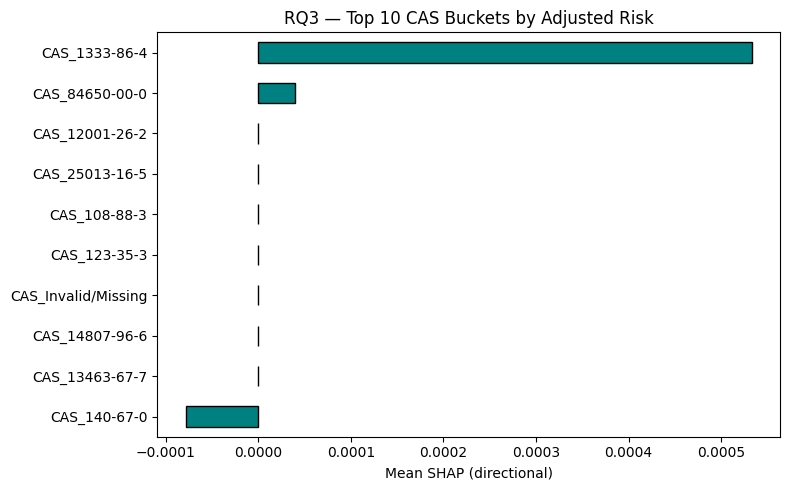


RQ3 — Top Chemicals (Directional Mean SHAP)


,0
ChemicalName_Trade Secret,0.000000
ChemicalName_Butylated hydroxyanisole,-0.001637
ChemicalName_Cocamide diethanolamine,-0.002956
"ChemicalName_Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.",-0.004338
ChemicalName_Other,-0.004407
ChemicalName_Vitamin A palmitate,-0.005353
ChemicalName_Carbon black,-0.008433
ChemicalName_Mica,-0.009822
ChemicalName_Titanium dioxide,-0.014082
ChemicalName_Talc,-0.024353


/tmp/ipython-input-3772909128.py:33: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


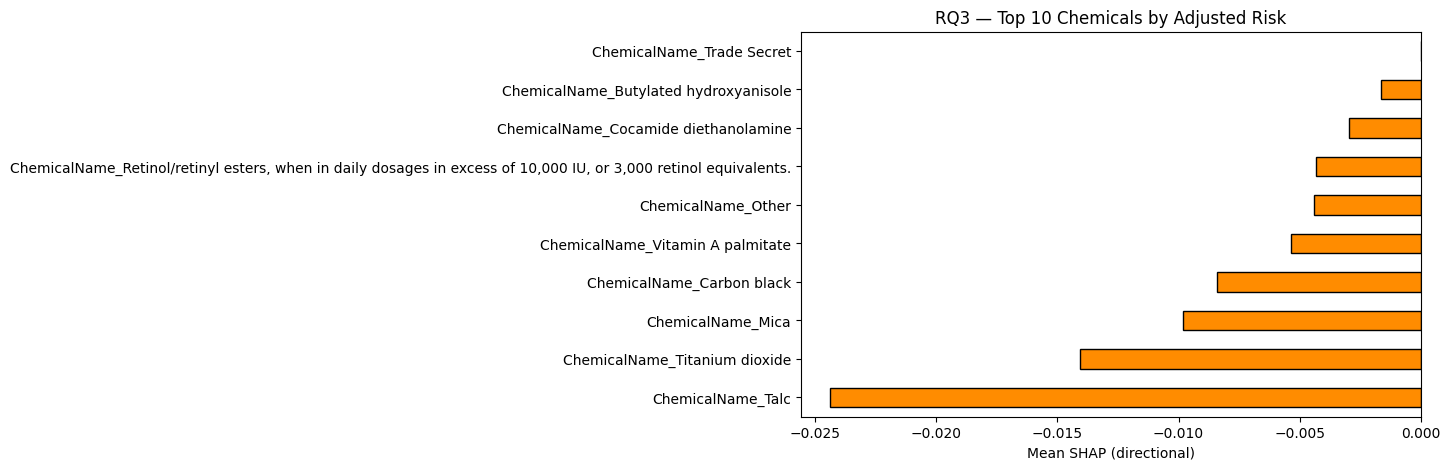

In [60]:
import matplotlib.pyplot as plt

# CAS signals (continuous)
print("RQ3 — CAS Signal Features (Directional Mean SHAP)")
display(cas_signal_risk)

plt.figure(figsize=(8,5))
cas_signal_risk[::-1].plot(kind="barh", color="darkcyan", edgecolor="black")
plt.title("RQ3 — CAS Signals: Adjusted Risk (Directional Mean SHAP)")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()

# CAS bucket dummies
print("\nRQ3 — Top CAS Buckets (Directional Mean SHAP)")
display(cas_bucket_risk.head(10))

plt.figure(figsize=(8,5))
cas_bucket_risk.head(10)[::-1].plot(kind="barh", color="teal", edgecolor="black")
plt.title("RQ3 — Top 10 CAS Buckets by Adjusted Risk")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()

# Chemical dummies
print("\nRQ3 — Top Chemicals (Directional Mean SHAP)")
display(chem_risk.head(10))

plt.figure(figsize=(8,5))
chem_risk.head(10)[::-1].plot(kind="barh", color="darkorange", edgecolor="black")
plt.title("RQ3 — Top 10 Chemicals by Adjusted Risk")
plt.xlabel("Mean SHAP (directional)")
plt.tight_layout()
plt.show()